In [3]:
# import Data Manipulation Libraries
import numpy as np
import pandas as pd

#Import Data Visualization Libraries 
import matplotlib.pyplot as plt
import seaborn as sns

#Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

#Import Logging Files
import logging
logging.basicConfig(level= logging.INFO,
                    filemode= 'w',
                    filename= 'model.log',
                    format= '%(asctime)s - %(levelname)s-%(message)s', force = True)

#Import Stats Scipy Library
import scipy.stats as stats 

In [4]:
#Data Import Using Pandas Function

url = 'https://raw.githubusercontent.com/vinnithakur/BANKTELEMARKETING_MLMODEL/refs/heads/main/BankTelemarketing.csv'

df =  pd.read_csv(url,sep = ';')

df.sample(frac =1)  #Shuffle Dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29399,42,blue-collar,married,primary,no,718,no,no,cellular,2,feb,556,2,-1,0,unknown,no
18480,38,admin.,single,secondary,no,-211,no,yes,cellular,31,jul,166,2,-1,0,unknown,no
17830,48,management,single,tertiary,no,906,yes,no,telephone,29,jul,289,9,-1,0,unknown,no
43427,27,technician,single,tertiary,no,-67,yes,no,cellular,6,apr,604,3,236,2,failure,yes
39043,37,blue-collar,divorced,primary,no,117,yes,no,cellular,18,may,125,3,350,4,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18482,49,management,divorced,secondary,no,4908,no,no,cellular,31,jul,42,4,-1,0,unknown,no
32778,38,admin.,divorced,secondary,no,382,yes,no,cellular,17,apr,397,1,-1,0,unknown,no
13272,56,blue-collar,single,secondary,no,663,no,yes,cellular,8,jul,819,3,-1,0,unknown,yes
5941,31,technician,married,secondary,no,1032,yes,no,unknown,26,may,70,6,-1,0,unknown,no


In [5]:
#Lock file
logging.info('Dataset Uploaded Successfully.....')

In [6]:
#Checking Data Shape and Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
logging.info('Dataset Uploaded Successfully.')

In [8]:
# Split the Dataset into Numerical_Data and Categorical_Data
Numerical_Data = df.select_dtypes(exclude = 'object')

Categorical_Data = df.select_dtypes(include = 'object')

In [9]:
# Checking Numerical_Data
Numerical_Data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [10]:
#Checking Categorical_Data
Categorical_Data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [23]:
# Checking Descriptive Stats : Numerical_Data and Categorical_Data
from collections import OrderedDict

stats = []

for i in Numerical_Data:
    
    numerical_stats = OrderedDict({
        'Feature': i,
        'Maximum': Numerical_Data[i].max(),
        'Minimum': Numerical_Data[i].min(),
        '25%': Numerical_Data[i].quantile(0.25),
        'Median' : Numerical_Data[i].quantile(0.50),
        '75%': Numerical_Data[i].quantile(0.75),
        'Kurtosis': Numerical_Data[i].kurt(),
        'Skewness': Numerical_Data[i].skew(),
        'Standard Deviation': Numerical_Data[i].std()
    })
    
    stats.append(numerical_stats)
    
    report = pd.DataFrame(stats)
    
report

,Feature,Maximum,Minimum,25%,Median,75%,Kurtosis,Skewness,Standard Deviation
0,age,95,18,33.0,39.0,48.0,0.319570,0.684818,10.618762
1,balance,102127,-8019,72.0,448.0,1428.0,140.751547,8.360308,3044.765829
2,day,31,1,8.0,16.0,21.0,-1.059897,0.093079,8.322476
3,duration,4918,0,103.0,180.0,319.0,18.153915,3.144318,257.527812
4,campaign,63,1,1.0,2.0,3.0,39.249651,4.898650,3.098021
5,pdays,871,-1,-1.0,-1.0,-1.0,6.935195,2.615715,100.128746
6,previous,275,0,0.0,0.0,0.0,4506.860660,41.846454,2.303441


In [24]:
logging.info('The Above Dataset is Non Normal Distributed..')

In [25]:
for i in Categorical_Data:
    print(Categorical_Data[i].value_counts())
    print('*'*40)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
****************************************
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
****************************************
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
****************************************
default
no     44396
yes      815
Name: count, dtype: int64
****************************************
housing
yes    25130
no     20081
Name: count, dtype: int64
****************************************
loan
no     37967
yes     7244
Name: count, dtype: int64
****************************************
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype

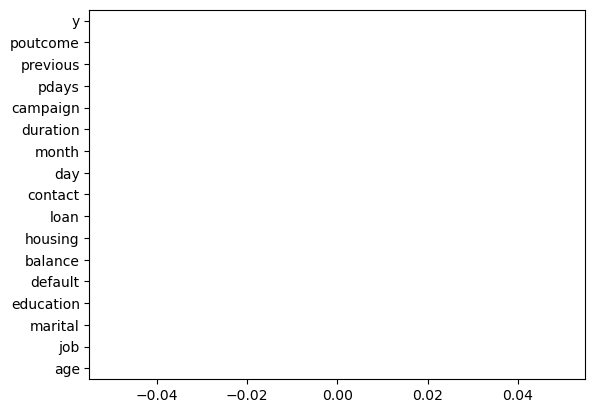

In [26]:
# Checking missing information if any using Graphical Method

df.isnull().sum().plot(kind = 'barh')
plt.show()

The Dataset Contains No missing Values